# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dimas Fawwaz Prabowo Kusumaji
- **Email:** dfawwazpk@outlook.com
- **ID Dicoding:** dfawwazpk

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah total penjualan pada setiap bulannya dari bulan September 2016 sampai bulan September 2018?
- Apa kategori produk yang paling diminati tiap tahunnya?
- Bagaimana ketepatan waktu pengiriman pesanan dapat mempengaruhi penilaian (review score) yang diberikan oleh buyer?

## Import Semua Packages/Library yang Digunakan

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [170]:
order_item_data = pd.read_csv('./data/olist_order_items_dataset.csv')
order_item_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [171]:
order_review_data = pd.read_csv('./data/olist_order_reviews_dataset.csv')
order_review_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [172]:
order_data = pd.read_csv('./data/olist_orders_dataset.csv')
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [173]:
product_data = pd.read_csv('./data/olist_products_dataset.csv')
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [174]:
cat_name_conversion = pd.read_csv('./data/product_category_name_translation.csv')
cat_name_conversion.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Menilai `order_item_data`

In [175]:
order_item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [176]:
order_item_data.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [177]:
print("Jumlah duplikasi: ", order_item_data.duplicated().sum())

Jumlah duplikasi:  0


Banyaknya jumlah duplikasi di sini tidak menjadi masalah, hal ini dikarenakan beberapa ZIP code dengan kordinat yang berdekatan berada pada kota yang sama.

In [178]:
order_item_data.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### Menilai `order_review_data`

In [179]:
order_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [180]:
order_review_data.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Banyaknya jumlah `review_comment_title` dan `review_comment_message` yang kosong di sini tidak menjadi masalah, hal ini dikarenakan kedua hal tersebut tidak menjadi pembahasan kali ini.

In [181]:
print("Jumlah duplikasi: ", order_review_data.duplicated().sum())

Jumlah duplikasi:  0


In [182]:
order_review_data.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


#### Menilai `order_data`

In [183]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [184]:
order_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data yang memiliki `order_approved_at`, `order_delivered_carrier_date` dan `order_delivered_customer_date` berupa nilai kosong di sini adalah order yang belum selesai atau dibatalkan. Hal ini tidak menjadi masalah dikarenakan pembahasan kali ini hanya berfokus pada order yang sudah selesai.

In [185]:
print("Jumlah duplikasi: ", order_data.duplicated().sum())

Jumlah duplikasi:  0


In [186]:
order_data.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai `product_data`

In [187]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [188]:
product_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [189]:
print("Jumlah duplikasi: ", product_data.duplicated().sum())

Jumlah duplikasi:  0


In [190]:
product_data.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### Cleaning Data

#### Membersihkan `order_data`

Menghapus semua data yang memiliki `order_status` selain "delivered" karena bukan merupakan fokus dalam pembahasan kali ini.

In [191]:
order_data.drop(order_data.loc[order_data['order_status']!='delivered'].index, inplace=True)

Menghapus data yang memiliki missing value.

In [192]:
order_data.dropna(axis = 0, how ='any', inplace=True)

Mengubah tipe data dari kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` menjadi datetime.

In [193]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime_columns:
    order_data[col] = pd.to_datetime(order_data[col])

Membuat kolom baru yang bernilai True jika waktu pesanan tiba kurang dari sama dengan estimasi waktu pesanan tiba.

In [194]:
order_data['is_ontime'] = order_data['order_delivered_customer_date'] <= order_data['order_estimated_delivery_date']

Membuat kolom baru yang menampilkan lama pesanan dari saat pesanan dikonfirmasi sampai pesanan diterima pembeli.

In [195]:
order_data['order_days_taken'] = (order_data['order_delivered_customer_date'] - order_data['order_approved_at']).dt.days

Menghapus semua data yang memiliki order_days_taken kurang dari 0. Hal ini dikarenakan sebuah pesanan tidak mungkin sampai sebelum dikirim.

In [196]:
order_data.drop(order_data.loc[order_data['order_days_taken']<0].index, inplace=True)

In [197]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_ontime,order_days_taken
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,12
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,2


Mengekspor dataframe ke dalam format CSV.

In [198]:
order_data.to_csv('./dashboard/order_data_cleaned.csv')

#### Membersihkan `product_data`

Menghapus semua data yang memiliki missing value pada kolom `product_category_name`.

In [199]:
product_data.dropna(axis = 0, how ='any',subset=['product_category_name'], inplace=True)

Menambahkan kolom baru yang berisikan nama kategori produk dalam bahasa Inggris, nilai dari kolom ini didapatkan dari tabel `cat_name_conversion`.

In [200]:
product_data = pd.merge(
    product_data,
    cat_name_conversion,
    how='left',
    on='product_category_name'
)

In [201]:
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Mengekspor dataframe ke dalam format CSV.

In [202]:
product_data.to_csv('./dashboard/product_data_cleaned.csv')

## Exploratory Data Analysis (EDA)

### Explore `order_item_data`

In [203]:
order_item_product_category = pd.merge(
    order_item_data,
    product_data,
    how='left',
    on='product_id'
)
order_item_product_category.groupby(['product_category_name_english']).size().sort_values(ascending=False)

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Length: 71, dtype: int64

Terlihat dari data di atas bahwa jenis produk yang paling banyak terjual adalah bed_bath_table yaitu sebanyak 11115 buah. Sedangkan, untuk jenis produk yang paling sedikit terjual adalah security_and_services yaitu sebanyak 2 buah.

In [204]:
order_item_data.groupby(['order_id']).sum().describe()

C:\Users\RAZER\AppData\Local\Temp\ipykernel_47504\15373939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_item_data.groupby(['order_id']).sum().describe()


,order_item_id,price,freight_value
count,98666.000000,98666.000000,98666.000000
mean,1.367604,137.754076,22.823562
std,2.272887,210.645145,21.650909
min,1.000000,0.850000,0.000000
25%,1.000000,45.900000,13.850000
50%,1.000000,86.900000,17.170000
75%,1.000000,149.900000,24.040000
max,231.000000,13440.000000,1794.960000


Terlihat dari data di atas bahwa pembeli rata-rata berbelanja sejumlah 137.75 real Brazil pada setiap ordernya. Rekor pesanan dengan total harga tertinggi adalah sejumlah 13440 real Brazil. Sedangkan pesanan dengan total harga terendah adalah sejumlah 0.85 real Brazil.

### Explore `order_review_data`

In [205]:
order_review_data.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Terlihat dari data di atas bahwa rata-rata rating yang diberikan pelanggan adalah 4.

### Explore `order_data`

In [206]:
order_data.describe()

,order_days_taken
count,96394.000000
mean,11.650891
std,9.515924
min,0.000000
25%,6.000000
50%,9.000000
75%,15.000000
max,208.000000


Terlihat dari data di atas bahwa rata-rata waktu yang dipelukan mulai dari order terkonfirmasi sampai order diterima pembeli adalah 12 hari. Untuk waktu terlama yang diperlukan adalah 208 hari. Sedangkan untuk waktu tercepat adalah kurang dari 1 hari.

### Explore `product_data`

In [207]:
product_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,10.245741,635.115225,1.736766,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Dari data di atas dapat dilihat nilai rata-rata dari panjang nama produk, panjang deskripsi produk, jumlah foto produk, berat produk, panjang produk, tinggi produk, dan lebar produk.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah total penjualan pada setiap bulannya dari bulan September 2016 sampai bulan September 2018?

In [208]:
order_data['order_month'] = order_data['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = order_data.groupby('order_month')['order_id'].count()


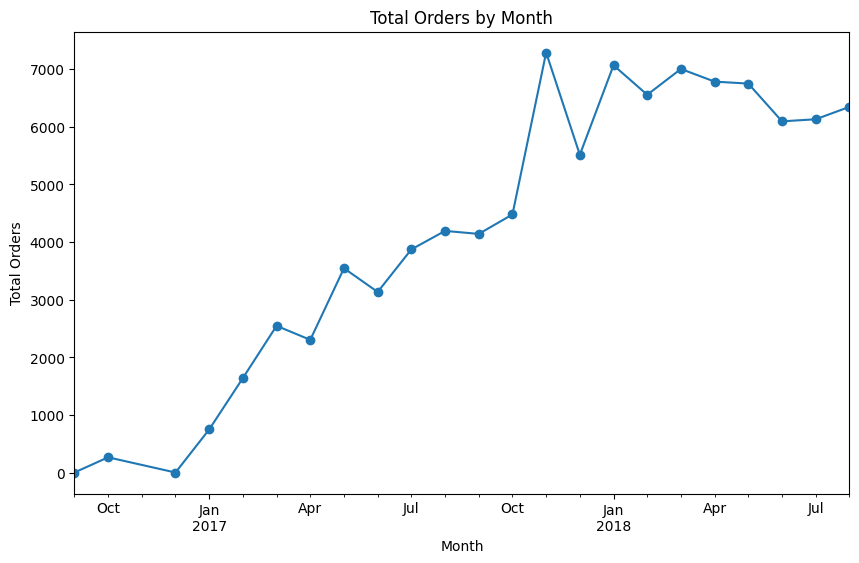

In [209]:
monthly_orders.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders by Month')
plt.show()

Dari grafik di atas dapat dilihat bahwa tren jumlah pesanan tiap bulannya selalu bertambah dengan beberapa pengecualian. Contohnya dapat dilihat pada bulan Desember 2017 dimana di bulan ini terjadi pengurangan jumlah penjualan sebelum naik lagi di bulan Januari 2018. Sedangkan pada bulan Maret 2018 dan seterusnya grafik terlihat stagnan dengan tidak adanya peningkatan penjualan yang signifikan.

### Pertanyaan 2: Apa kategori produk yang paling diminati tiap tahunnya?

In [210]:
order_item_product_category = pd.merge(
    order_item_product_category,
    order_data,
    how='left',
    on='order_id'
)

order_item_product_category['order_year'] = order_item_product_category['order_approved_at'].dt.to_period('Y')

grouped_data = order_item_product_category.groupby(['product_category_name_english', 'order_year']).size().reset_index(name='count').sort_values(by='order_year', ascending=True)
years = grouped_data['order_year'].unique()
year_total = grouped_data.groupby('order_year')['count'].transform('sum')
grouped_data['percentage'] = grouped_data['count'] / year_total * 100
grouped_data.loc[grouped_data['percentage'] < 4, 'product_category_name_english'] = 'others'
grouped_data = grouped_data.groupby(['product_category_name_english', 'order_year']).sum().reset_index().sort_values(by='count', ascending=False)

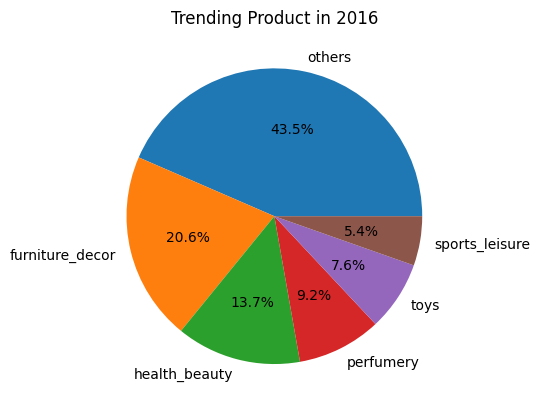

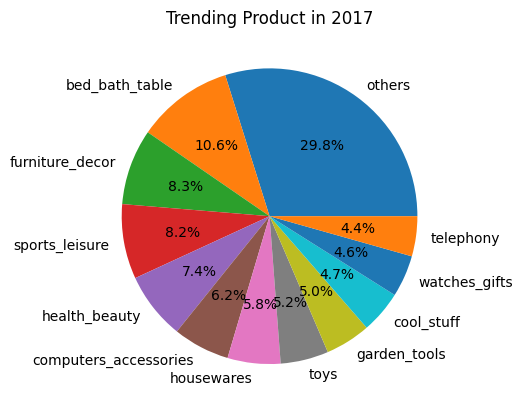

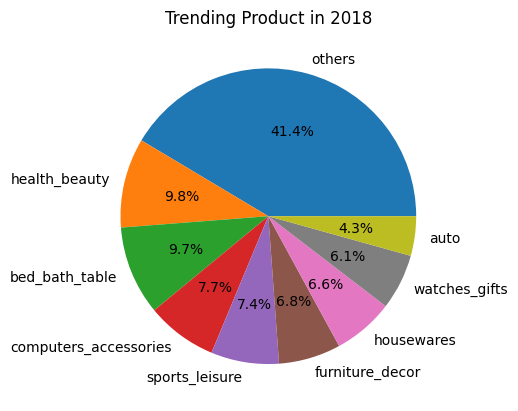

In [211]:
for year in years:
    year_data = grouped_data[grouped_data['order_year'] == year]
    
    plt.figure()
    plt.pie(year_data['count'], labels=year_data['product_category_name_english'], autopct='%1.1f%%')
    plt.title(f'Trending Product in {year}')
    plt.show()


Dari chart di atas dapat dilihat bahwa kategori produk yang paling diminati pada tahun 2016 adalah furniture_decor. Sedangkan untuk tahun 2017 adalah kategori bed_bath_table. Dan terakhir untuk tahun 2018 adalah kategori health_beauty.

### Pertanyaan 3: Bagaimana ketepatan waktu pengiriman pesanan dapat mempengaruhi penilaian (review score) yang diberikan oleh buyer?

In [212]:
order_review_data = pd.merge(
    order_data[['order_id','is_ontime']],
    order_review_data[['order_id', 'review_score']],
    how='left',
    on='order_id'
)

In [213]:
order_review_data = order_review_data.groupby(['review_score', 'is_ontime']).size().unstack()
order_review_data.head()


is_ontime,False,True
review_score,,
1.0,3553,5848
2.0,606,2334
3.0,875,7083
4.0,953,18024
5.0,1710,55293


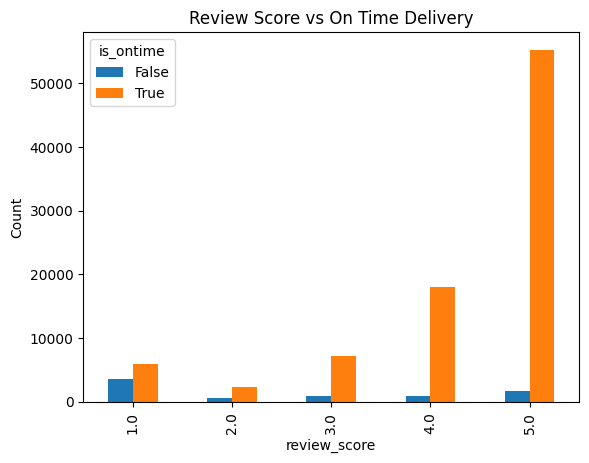

In [214]:
order_review_data.plot(kind='bar')
plt.xlabel('review_score')
plt.ylabel('Count')
plt.title('Review Score vs On Time Delivery')
plt.show()


Dari chart di atas dapat dilihat bahwa pembeli yang menerima pesanannya tepat waktu cenderung memberikan rating yang tinggi seperti 4 atau 5. Sedangkan pembeli yang pesanannya tiba terlambat cenderung memberikan rating rendah seperti 1. Tetapi tidak menutup kemungkinan bahwa pembeli yang menerima pesanannya tepat waktu tetapi tetap memberikan rating rendah. Hal ini dapat dilihat dari jumlah pembeli yang menerima pesanannya tepat waktu yang memberikan rating 1 lebih tinggi daripada yang memberikan rating 2.

## Conclusion

### Conclution pertanyaan 1

Telah diketahui bahwa tren jumlah pesanan tiap bulannya selalu bertambah dengan beberapa pengecualian. Contohnya dapat dilihat pada bulan Desember 2017 dimana di bulan ini terjadi pengurangan jumlah penjualan sebelum naik lagi di bulan Januari 2018. Sedangkan pada bulan Maret 2018 dan seterusnya grafik terlihat stagnan dengan tidak adanya peningkatan penjualan yang signifikan.

### Conclution pertanyaan 2

Telah diketahui bahwa kategori produk yang paling diminati pada tahun 2016 adalah furniture_decor. Sedangkan untuk tahun 2017 adalah kategori bed_bath_table. Dan terakhir untuk tahun 2018 adalah kategori health_beauty. Dengan keterangan bahwa data dari tahun 2016 tidak selengkap data dari tahun 2017 dan 2018. Hal ini dikarenakan dataset hanya memuat data dari bulan September 2016.

### Conclution pertanyaan 3

 Telah diketahui bahwa pembeli yang menerima pesanannya tepat waktu cenderung memberikan rating yang tinggi seperti 4 atau 5. Sedangkan pembeli yang pesanannya tiba terlambat cenderung memberikan rating rendah seperti 1. Tetapi tidak menutup kemungkinan bahwa pembeli yang menerima pesanannya tepat waktu tetapi tetap memberikan rating rendah. Hal ini dapat dilihat dari jumlah pembeli yang menerima pesanannya tepat waktu yang memberikan rating 1 lebih tinggi daripada yang memberikan rating 2. Tentunya banyak faktor yang mempengaruhi hal ini, seperti komunikasi penjual, ketepatan jenis barang dengan yang terdapat pada gambar, dll. Ketepatan waktu pengiriman ini hanyalah salah satu faktor yang mempengaruhi rating suatu pesanan.